In [1]:
import sys
import json
import pandas as pd 
import numpy as np 
from scipy import stats
from sklearn import cluster, linear_model
import matplotlib.pyplot as plt
np.set_printoptions(precision=3, suppress=True)
import os

from scipy import signal
import pickle
from sklearn.decomposition import FastICA, PCA
import itertools as iter
from sklearn import preprocessing as prep
import seaborn as sns
import statsmodels as sts
import time
import matplotlib.pyplot as plt
%matplotlib inline
#sys.path.append('/home/ak/Documents/Research/hsmm/') 
#sys.path.append('/home/ak/Documents/Research/hsmm/hsmm/') 
#sys.path.append('/home/kman/Research/hsmm/')
doc_path= ('/home/ak/Documents/Data/')
graph_path=('/home/ak/Documents/Research/Thesis/')
data_path_gp = doc_path + 'GPDATA/'
import seaborn as sns
plt.style.use('fivethirtyeight')


In [2]:
#search only for npy files
npy_files=[s for s in os.listdir(data_path_gp) if s.endswith('.npy')]
npy_files
#os.listdir(data_path_gp)

['ksi_metrics.npy', 'fischer_polar.npy', 'im_metrics.npy']

In [3]:
#load bot matrix and vector valued

fischer_polar =np.load(data_path_gp+'fischer_polar.npy')
ksi_metrics =np.load(data_path_gp+'ksi_metrics.npy').item()
im_metrics= np.load(data_path_gp+'im_metrics.npy').item()

In [4]:
ksi_keys=ksi_metrics.keys()#['spectral', 'determ', 'trace']
im_keys=im_metrics.keys()#same as above


In [8]:
fischer_polar

array([[[   8.017,    2.   ,    3.295],
        [  14.691,    1.775,    3.297],
        [  20.115,    1.962,    3.322],
        ...,
        [1172.185,    1.584,    3.216],
        [1171.94 ,    1.584,    3.217],
        [1171.224,    1.584,    3.209]],

       [[   4.629,    1.523,    3.384],
        [   8.774,    1.58 ,    3.398],
        [   5.009,    1.389,    5.54 ],
        ...,
        [ 920.261,    1.784,    3.214],
        [ 920.149,    1.784,    3.215],
        [ 920.624,    1.784,    3.217]],

       [[   8.064,    1.343,    3.283],
        [   3.631,    1.65 ,    5.622],
        [  74.722,    1.607,    6.239],
        ...,
        [ 832.604,    1.879,    3.098],
        [ 832.615,    1.879,    3.099],
        [ 830.895,    1.88 ,    3.101]],

       ...,

       [[   9.735,    1.421,    3.257],
        [   4.132,    0.978,    3.847],
        [   4.913,    0.764,    4.514],
        ...,
        [1565.849,    1.721,    3.191],
        [1566.11 ,    1.721,    3.192],
        [

In [6]:
x=fischer_polar.shape[0]
y=fischer_polar.shape[1]
z=fischer_polar.shape[2]

In [8]:
_keys=ksi_keys #names are the same for all files
#deal with ksi-first
ksi_spectral=pd.DataFrame(ksi_metrics[_keys[0]]) #spectral gap
ksi_determ =pd.DataFrame(ksi_metrics[_keys[1]]) #determinant
ksi_trace=pd.DataFrame(ksi_metrics[_keys[2]]) #trace

keys2idx={_key:i for i,_key in enumerate(_keys)} #enumerate the keys

keys2idx

{'determ': 1, 'spectral': 0, 'trace': 2}

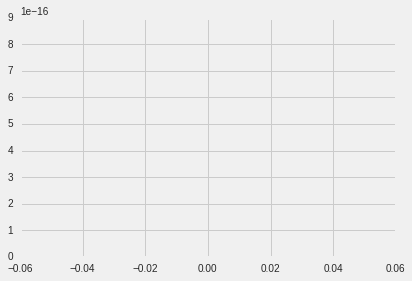

In [17]:
ksi_determ[:1]
plt.show()

We create state sequences of fixed length 1500 and for every fixed length generate 10e4 copies of observation data from the above distribution. 
#Axis 0 is thus the first dimension (the "rows"), and axis 1 is the second dimension (the "columns").
 z=3, as we what rho, \phi_0, \phi_1

In [9]:
_copies=ksi_determ.shape[0]
_seq_length =ksi_determ.shape[1]

_key=0
_keys[_key]

#summing across copies (each column is a running sum)- these are running sums so they have 
_sequences_sum=ksi_metrics[_keys[_key]].cumsum(axis=0) #.sum(axis=0) which sums along the rows (producing column totals)- so this is running sums along the copies
_copies_sum=ksi_metrics[_keys[_key]].cumsum(axis=1) #this is running sums along the sequences

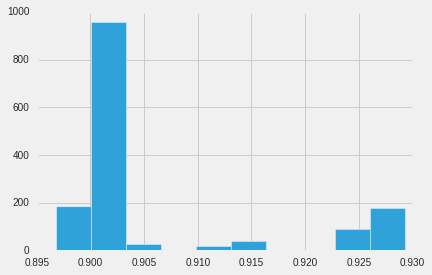

In [10]:
_average_=pd.DataFrame(ksi_metrics[_keys[_key]]).mean(axis=0) #averge across sequences
_average_.hist()
plt.show()

In [ ]:
#pd.DataFrame(ksi_metrics[_keys[_key]]).head(10).cumsum(axis=1).mean()94

In [ ]:
_sequences_sum.shape
_test=pd.DataFrame(_sequences_sum).head(1000)
for idx,row in _test.iterrows():
    idx=_test.index.to_series(axis=1)+1
    plt.plot(row.div(idx),linewidth =2,alpha = 0.4,ls='--',color='lightblue')
    normalised_test= row.div(idx)

plt.ylabel('Avg '+str(_keys[_key]),fontsize=12)
plt.xlabel('t:Sequence Length',fontsize=12)
plt.title("Convergence of Ksi " +str(_keys[_key])+ " with Increase in t",fontsize=14)
plt.savefig(graph_path+'ksi_spectral_1.png', format='png', dpi=1200)

In [ ]:
_copies_sum.shape
_test=pd.DataFrame(_copies_sum).head(2500)
for idx,row in _test.iterrows():
    idx=_test.index.to_series(axis=1)+1
    plt.plot(row.div(idx),linewidth =2,alpha = 0.4,ls='--',color='lightblue')
    normalised_test= row.div(idx)
    # Plot the response with standard error
    sns.tsplot(data=normalised_test, time=idx)

# plt.ylabel('Avg '+str(_keys[_key]),fontsize=12)
# plt.xlabel('t:Sequence Length',fontsize=12)
# plt.title("Convergence of Ksi " +str(_keys[_key])+ " with Increase in t",fontsize=14)

In [ ]:
# Load the long-form example gammas dataset
gammas = sns.load_dataset("gammas")

# Plot the response with standard error
sns.tsplot(data=gammas, time="timepoint", unit="subject",
           condition="ROI", value="BOLD signal")

In [ ]:
gammas

In [ ]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
fig = plt.figure()

ax = Axes3D(fig) 
#Create grid and multivariate normal
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)

In [ ]:
x1=_sequences_sum[500]
x2=_sequences_sum[1100]
x3=_sequences_sum[700]
y=np.linspace(0,0.2,x3.size)
plt.figure()

from mpl_toolkits.mplot3d import axes3d, Axes3D
fig = plt.figure()

ax = Axes3D(fig) 
x=np.linspace(1,5,x3.size)
z=np.sin(x/2)
x.size
ax.plot_surface(x1, y,z, color='r')
#ax.plot_surface(x2, y,z, color='b')
#ax.plot_surface(x3, y,z, color='g')
# ax.set_ylabel('Sequence #')
#ax.set_xlabel('Running average of Ksi Spectral Gap')
#ax.add_collection3d(plt.fill_between(ksi_1100, 0.95*z, 1.05*z, color='r',alpha=0.3),zs=1,zdir='x')
#ax.add_collection3d(plt.fill_between(ksi_500, 0.95*z, 1.05*z, color='b',alpha=0.3),zs=1,zdir='x')


plt.show()

In [ ]:
#Fischer Polar Coordinates
_shape=fischer_polar.shape
no_copies =_shape[0] #think about this as #of days
no_seqns=_shape[1] #think about this as #time in the day
no_elements= _shape[2] #\rho, \phi_0, \phi_1
print "the number of copies (rows):", no_copies, "and the number of sequences (columns):", no_seqns


In [ ]:
plt.plot(_copies_sum[100])

In [ ]:


# replace the hard coded data frame with all of them when you iterate indexed on keys
#denominator=_copies_sum.index.values+1
#norm_cs =[_copies_sum/j for j in range(len(_copies_sum)]
# norm_spectral_cs =_copies_sum.divide(denominator, axis='rows')
# norm_spectral_average = norm_spectral_cs.mean(axis=1) #calculate average
# _std=norm_spectral_cs.std(axis=1) #calculate standard-deviation
pd.DataFrame(_copies_sum).index

In [ ]:
plt.style.use(['seaborn-whitegrid'])
plt.plot(norm_spectral_cs[10:],linewidth =2,alpha = 0.4,ls='--',color='lightblue')
plt.ylabel('Spectral Gap')
plt.title('k')
plt.text(30, .025, r'$\mu=100,\ \sigma=15$')
#plt.title('title', fontsize=10)
#plt.ylabel('Y-Axis')
plt.show()
#plt.plot(norm_spectral_average[10:])
#plt.show()

In [ ]:
norm_copies=np.zeros_like(_copies_total)
no_copies, seqns, polar_cos =norm_copies.shape

%timeit
def normalise_df(df):
    df_norm=pd.DataFrame()
    detominator=df.index.values+1
    for col in list(df.columns):
        df_norm[col] = df[col] / (denominator)
    return df_norm

In [ ]:
_time_averaged=pd.DataFrame(fischer_time_average.mean(axis=1))
_std= pd.DataFrame(fischer_time_average.std(axis=1))


In [ ]:
_time_averaged.columns.values

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.asarray(_time_averaged.index)
y = np.asarray(_time_averaged[1])
z = np.asarray(_time_averaged[2])



In [ ]:
plt.plot(np.log(y))

In [ ]:
error = np.asarray(_std[1])

plt.plot(x, y, 'k-',linewidth=0.7)
plt.fill_between(x, y-error, y+error, alpha=0.6, edgecolor='#1B2ACD', facecolor='#089FFF',
    linewidth=0.1, linestyle='dashdot', antialiased=False)
plt.title('Average Sequence')
plt.legend()
plt.show()